# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
   
   
   
* [차원-축소](#차원-축소)
  * [Feature Selection](#Feature-Selection)
      * [filter](#filter)
      * [wrapper](#wrapper)
      * [embeded](#embeded)
  * [Dimensionality Reduction](#Dimensionality-Reduction)
      * [PCA](#PCA)
  * [pooling](#pooling)
  * [stride](#stride)
      * [view_as_blocks](#view_as_blocks)
          * [local max pooling](#local-max-pooling)
          * [local mean pooling](#local-mean-pooling)
      * [view_as_window](#view_as_window)



---

basic.pdf 참고


Convolution의 Stride, Pooling을 차원 축소 관점에서 알아볼 것

## 차원 축소


전제 조건
1. feature 마다 중요도 상이
2. feature 특성에 변화가 없어야함
    - 데이터 손실은 있음
    - 이미지에서의 특성은 큰 값
        - 영상 데이터는 실제 데이터와 달리 클수록 흰색에 가까움
            - 색읨 삼원소를 합치면 검은색
            - 빛의 삼원소를 합치면 흰색
                - 디지털이미지는 빛을 이용하므로 값이 클수록 흰색에 가까워짐 



> 어떤 모델의 (층의 개수나 뉴런 개수에 해당하는) 적절한 크기나 구조를 결정하는 마법같은 공식은 없습니다.

- 레이어 많을 수록 gradient vanishing 문제, 과적합 문제 생김
-  dropout: 차원 줄이기 위해서 random 하게 unit 없앰
참고: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko


필요한 이유 
- feature가 많을수록 설명력은 풍부해지면서 모델의 완결성을 보장하나 필요 이상으로 복잡한 모델(과적합)이 되면 모델의 일반화(generalization)가 보장되지 못함
- 차원이 클수록 데이터 맣이 필요함
    - 차원의 저주
    - 차원에 비해 데이터 적으면 과적합 현상 발생
- 차원의 저주 해결하는 법 
     1. 데이터 양 늘림(general한 성능 향상)-> 현실에서는 힘듦
     2. **feature selection(차원 선택)**
         1. filter
             - feature간 통계값(chi2, 상관계수) 구해서 중요도 파악
         2. wrapper
             - 다른 알고리즘 감싸고 있음
         3. embeded
             - 모두가 중요한 특성이 아니므로 예측 성능을 떨어뜨리지 않는 범위내에서 덜 중요한 변수 제거
                 - feature importance : 차원마다 중요도/영향력이 다름
             - DL: dropout- 랜덤하게 feature 제거
      3. PCA 
             - 차원 축소하면서 값 바뀜

In [1]:
import seaborn as sns

<AxesSubplot:>

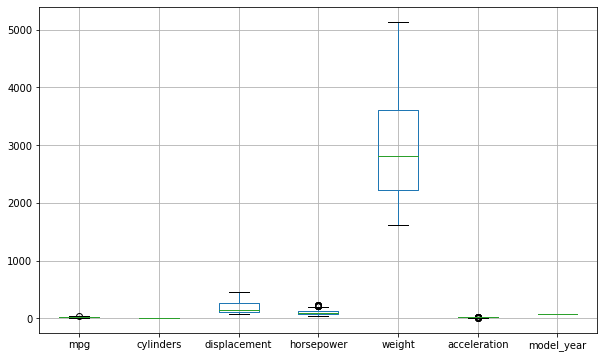

In [2]:
mpg= sns.load_dataset('mpg')
mpg.boxplot(figsize=(10,6)) #큰값 ==큰 영향력  -> 스캐일링했었음 

In [3]:
mpg   #feature/차원 8개 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
import seaborn as sns

In [5]:
iris=sns.load_dataset('iris')

In [6]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest
- ensemble 기법으로 decision tree 를 bagging
    - Bagging(Bootstrap Aggregation) 모델 여러개를 사용하는 ensemble 기법
### Decision Tree
- 의사 결정나무

- 과정합 방지하기 위해서 의사결정 나무를 가지치기(prunning)함 
    - Ginni 계수, entropy 기반

        - entropy 정보 무질서도 최소화
        - Information Gain 기반으로 가지치기

가지의 root에 가까울 수록 중요함 


scikit  - 이진 분류 지원

In [7]:
rf=RandomForestClassifier() #모델 인스턴스화
vars(rf)                   

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'min_impurity_split',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_le

In [8]:
rf.fit(iris.iloc[:,:-1],iris.species) #학습

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

학습을 시키면 `vars` 내부에 추가됨

In [9]:
vars(rf)  #여러개의 의사결정나무가 있는것을 알 수 있음

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'min_impurity_split',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_le

#### feature importance
- dt, random forest에는 feature importance 있음 

크기가 작은것이 영향력이 가장 작음 

In [10]:
rf.feature_importances_ #sepal_width 가 제일 덜 중요함 ->제거 가능

array([0.1085037 , 0.02390519, 0.44598766, 0.42160345])

### Feature Selection
 - column 그대로 가져와 고유의 의미 유지

### filter
- chi2,correlation 와 같은 통계 기반으로 덜 중요한 값 제거
- chi2값 기반으로 k개의 큰값(중요한 값 ) 추출

In [11]:
from sklearn.feature_selection import chi2, SelectKBest

In [12]:
skb=SelectKBest(chi2, k=3) #3개의 featrue 선택:sepla_length, petal length&width

In [13]:
skb.fit(iris.iloc[:,:-1], iris.species)

SelectKBest(k=3, score_func=<function chi2 at 0x7fbd9be0c050>)

In [14]:
skb.fit_transform(iris.iloc[:,:-1], iris.species) #sepal_Width 제거함 ->3개 선택

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [15]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### wrapper
- 알고리즘을 감싸고 있음
- Recursive Feature Elemination(RFE)
- 전체 데이터에서 logistic regression 모델 기준으로 하나씩 지워 보았을때 성능 가장 좋은 feature 조합 선택

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [17]:
rfe=RFE(LogisticRegression(),n_features_to_select=3) #Logistic 감싸고 있음
rfe.fit(iris.iloc[:,:-1], iris.species)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=3, step=1, verbose=0)

In [18]:
rfe.fit_transform(iris.iloc[:,:-1], iris.species) #sepal_Width 제거함 ->3개 선택

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

In [19]:
vars(rfe) #ranking_도 있음

{'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'n_features_to_select': 3,
 'step': 1,
 'verbose': 0,
 'estimator_': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'n_features_': 3,
 'support_': array([False,  True,  True,  True]),
 'ranking_': array([2, 1, 1, 1])}

### embeded
- 알고리즘 자체에서 feature 뽑아냄
- scikit-learn  에서는  decision boundary 지원
    - decision_function

In [20]:
lr=LogisticRegression()
lr.fit(iris.iloc[:,:-1], iris.species) #sepal_Width 제거함 ->3개 선택

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
lr.decision_function(iris.iloc[:,:-1])

array([[  7.34119587,   3.35341207, -10.69460794],
       [  6.94165505,   3.40456842, -10.34622347],
       [  7.47065227,   3.2555761 , -10.72622837],
       [  6.91162937,   3.19409284, -10.10572221],
       [  7.47964369,   3.26894149, -10.74858518],
       [  6.62916458,   3.13725184,  -9.76641642],
       [  7.34522251,   3.02490021, -10.37012272],
       [  7.03427455,   3.31187765, -10.3461522 ],
       [  7.05409147,   3.17087053, -10.224962  ],
       [  6.89459703,   3.44799105, -10.34258808],
       [  7.15691973,   3.42966246, -10.58658219],
       [  6.86580105,   3.18587265, -10.05167371],
       [  7.09187887,   3.44635431, -10.53823318],
       [  8.0572538 ,   3.24106044, -11.29831424],
       [  8.03586965,   3.60729379, -11.64316344],
       [  7.49109452,   3.17902124, -10.67011576],
       [  7.63757089,   3.2170472 , -10.85461809],
       [  7.23278609,   3.2585981 , -10.49138419],
       [  6.51549846,   3.42259254,  -9.938091  ],
       [  7.27058585,   3.14432

### dimensionality reduction
- 
### PCA
- 상황에 따라서 원래 의미를 잃어버린 채 특징을 잃어버린채 틍직을 대표하는 값으로 바뀜

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(3)
pca.fit_transform(iris.iloc[:,:-1], iris.species) #sepal_Width 제거함 ->3개 선택

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

### Feature Extraction
- ML(통계) 
    - 사람이 직접 feature extraction 하고 모델에 넣음 
    -  scikit - encoding: 숫자가 아닌값을 숫자로..
- DL -
    - end-to-end : **학습을 통해서 한꺼번에  feature extraction + model 까지 해결**
        - CNN:convolution으로 특징 뽑음
        - NLP: embedding으로 특징 뽑음
        
  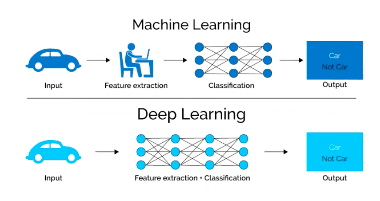


###  model selection
- 각 데이터마다 알 여러개 다 써보고 결정해야함 ( 만능 알고리즘은 없다)
> No Free Luch 
    - 공짜 점심은 없다
    - The supervised learning no-free-lunch theorems(2002),by D.H.Wolpert
    - 특정 데이터에 대해서 항상 좋은 알고리즘 없다.
    

> 마스터 알고리즘 
    -  모든 데이터에 성능이 가장 좋은 알고리즘 존재한다 
                        - Pedro Domingos -

### model
- non parametric (비모수) model
    - 모양에 따라서 성능이 바뀜
    - 예. 신경망, decision tree
        - dt y/n 
        - 맨위가 가장 중요함 
        -  entropy, Ginni 이용
            - cross entorpy
            정보의 무질서도를 낮추는 (IG찾고 가지치기함...)
            - 데이터를 통해서 나무 형성
            - scikit- 이진 가지만   지원 feature importances
    > Leo Breiman 
        - bagging, random Forest, Decision Tree계열 만든 사람 
        - Classification and Regression Trees(CART)
            - C3, J48 알고리즘으로 확장 변형 
        - Statistifcal Modeling :The Two Cultures
            - non parametric 도 중요하다 
    - Random Forest: dt +bagging
        - 이전에 가장  인기 많았으나 lightGVM, XGboosting


Pooling, strides를 사용하면  **dimensionality reduction** 효과 줌 

## pooling
- window function :이동하면서 가장 중요한 feature 추출하기 위해서 aggregation을 함
- **feature importance처럼 중요한 값 추출**
    - max pooling
    - mean/avg pooling
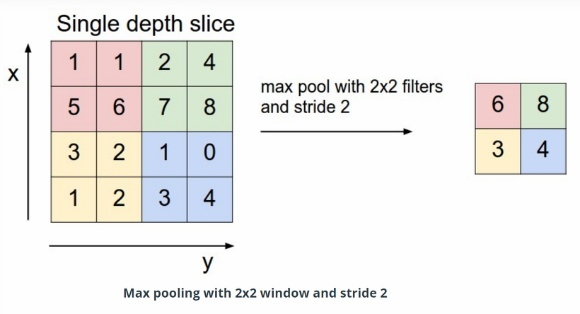
4x4 데이터를 (2,2)window로 stide 2 로하여  2 x 2로 축소함
        
### stride 
- Numpy array
     -  1열로 되어있는데 등간격으로 다차원 표시
- 보폭
    - stride 1
        - window: 전체 데이터르 보는게 아닌 window 크기만큼 일부만 봄
        - 한 칸씩 이동
        - 겹치는 구간(overlapping)이 더 많음
        차원축소 개념에서 이어짐
    - stride 3  
        - 세칸씩 이동 
        - 더 큰 차원 축소

view_as_blocks, view_as_windows로 stride와 같은 효과를 줌
 
### view_as_blocks
- pooling과 다르게 겹치는게 없음
- stride크기가 window 크기랑 같거나 큰 경우와 동일하여 overlapping 없음(partition개념)
- window 보다 섬세하지 않지만 빠른 처리 가능

In [25]:
from skimage import data #연습용 데이터
from skimage.util import view_as_blocks,view_as_windows

In [26]:
camera= data.camera()  

In [27]:
import matplotlib.pyplot as plt

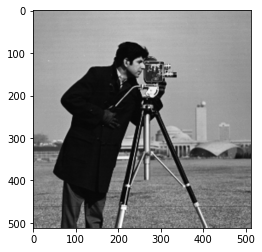

In [28]:
plt.imshow(camera, cmap='gray')

In [29]:
camera.shape #(512,512)

(512, 512)

### view_as_blocks
- overlapping이 없음
- 값이 강조됨
- 차원 축소 : 차원의 저주 없음, 빠른 연산


모든 이미지를 4,4 크기로 block 으로 쪼갬.
- 각 기법 각 각 적용 가능

In [30]:
view=view_as_blocks(camera,(4,4)) #512== 2**9
view

array([[[[156, 157, 160, 159],
         [156, 157, 159, 158],
         [158, 157, 156, 156],
         [160, 157, 154, 154]],

        [[158, 156, 155, 156],
         [158, 156, 155, 156],
         [157, 157, 157, 157],
         [156, 157, 158, 157]],

        [[158, 157, 156, 157],
         [158, 157, 156, 157],
         [157, 158, 158, 158],
         [157, 158, 160, 159]],

        ...,

        [[156, 155, 154, 153],
         [156, 155, 154, 153],
         [156, 155, 154, 154],
         [156, 155, 155, 155]],

        [[153, 151, 151, 150],
         [153, 151, 151, 150],
         [154, 153, 153, 152],
         [155, 154, 154, 154]],

        [[151, 152, 152, 152],
         [151, 152, 152, 152],
         [153, 152, 152, 152],
         [155, 153, 152, 152]]],


       [[[158, 157, 156, 156],
         [156, 157, 159, 159],
         [158, 157, 156, 156],
         [160, 157, 154, 154]],

        [[157, 156, 155, 155],
         [159, 156, 154, 155],
         [157, 156, 155, 155],
         

데이터 NNHW 4x4가 128 개 ,128개 있음 

#### -1 technique 전체 
- Numpy 
    - reshape: 원소 갯수(size) 유지하고 모양 변경할때 **자동으로 크기 맞춤**( element 크기는 동일하므로 가능)
- 다른 음수 숫자 사용해도 동일

In [31]:
view.shape #512/4=128

(128, 128, 4, 4)

In [32]:
#max pooling -> 3차원 데이터로 만듦 
flatten_view=view.reshape(view.shape[0], view.shape[1],-1) #

- convolution 
    -  filter : 이미지의 작은 커널(패치) 행렬 곱하여 새로운 값 나타나게 함
    - channel 정보가 필요

참고: https://www.tensorflow.org/tutorials/images/cnn?hl=ko

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)) #채널 1
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

#### mutable 3가지
- return None 
    - 자기자신 바뀜
- return 있음
    - 자기 자신 바뀜
    - 자기 자신 안바뀜

In [34]:
import numpy as np
x= np.arange(24)
x.resize(2,6) #return 없음 -> 자기 자신 변함
x

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [35]:
a=np.arange(24).reshape(2,-1,4) # -1 technique 자동으로 크기 맞춤
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [36]:
a.shape #3차원

(2, 3, 4)

잘 모를때 shape  확인하면 이해 쉬움.
axis=0
    - (128,16)
axis=1
    - (128,16)
axis=2
    - (128,128)

In [37]:
a.max(axis=0) #행렬 (3,4)관점에서 비교 (element -wise)

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [38]:
a.max(axis=1)  #(2,4)관점에서 비교

array([[ 8,  9, 10, 11],
       [20, 21, 22, 23]])

In [39]:
a.max(axis=2) #(2,3) 관점에서 비교

array([[ 3,  7, 11],
       [15, 19, 23]])

In [40]:
a.sum() #axis=None 전체합

276

In [41]:
a=np.arange(6).reshape(2,3)
np.max(a)

5

In [42]:
np.maximum([1,2,2],[1,2,3]) #ufunc 값 비교 -elemet wise

array([1, 2, 3])

In [43]:
a.max(axis=1)

array([2, 5])

- 각 나누어진 128개의 이미지 16개

In [44]:
flatten_view.shape #3차원.

(128, 128, 16)

In [45]:
np.max(flatten_view, axis=0) # (128,16) 관점

array([[165, 165, 168, ..., 166, 169, 170],
       [171, 167, 168, ..., 166, 167, 166],
       [167, 166, 166, ..., 167, 174, 183],
       ...,
       [160, 159, 162, ..., 170, 172, 174],
       [157, 155, 156, ..., 175, 173, 172],
       [156, 156, 154, ..., 171, 170, 170]], dtype=uint8)

In [46]:
np.max(flatten_view, axis=1) #( 128,16)

array([[187, 186, 188, ..., 187, 188, 186],
       [187, 186, 186, ..., 188, 188, 186],
       [189, 187, 187, ..., 189, 190, 190],
       ...,
       [246, 236, 249, ..., 250, 251, 254],
       [244, 252, 251, ..., 255, 251, 239],
       [248, 255, 250, ..., 255, 249, 233]], dtype=uint8)

(128,128,16)
- ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ 
- (128,128) 데이터가 16개 있음

In [47]:
view_max=np.max(flatten_view, axis=2) # (128,128)관점
view_max

array([[160, 158, 160, ..., 156, 155, 155],
       [160, 159, 160, ..., 157, 155, 154],
       [158, 159, 159, ..., 154, 154, 152],
       ...,
       [130, 131, 154, ..., 134, 114, 125],
       [133, 124, 156, ..., 148, 151, 138],
       [130, 166, 173, ..., 140, 136, 134]], dtype=uint8)

### Global pooling
- 이미지 한개 전체를 pooling하여 1개의 값으로 변경
-  dense 에 넣기 위해 flatten 불필요
    - `model.add(keras.layers.GlobalAveragePooling1D()`
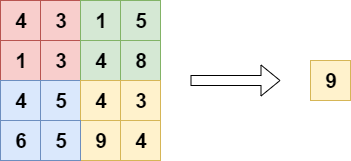

### Local pooling
- 지정해준 window와 stride의 값에 따라 차원 축소
- Local: 부분부분을 조각내서 저용함
     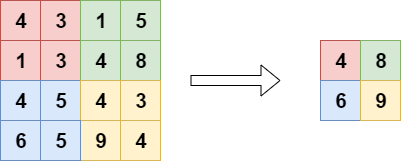
     
 참고: https://www.machinecurve.com/index.php/2020/01/30/what-are-max-pooling-average-pooling-global-max-pooling-and-global-average-pooling/
 
###  local max pooling
- 최대값

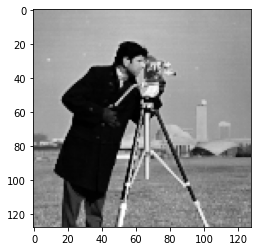

In [48]:
plt.imshow(view_max, cmap='gray')

#### local mean pooling
- 평균값

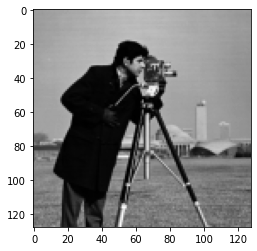

In [49]:
view_mean=np.mean(flatten_view, axis=2) 
plt.imshow(view_mean, cmap='gray')

#### local avg pooling
- 가중치

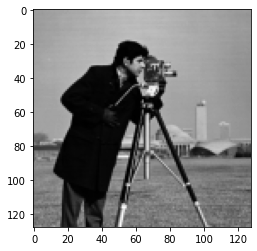

In [50]:
view_avg=np.average(flatten_view, axis=2) 
plt.imshow(view_avg, cmap='gray')

In [51]:
(view_avg!=view_mean).sum() #완전히 동일함

0

512/4=128

In [52]:
#해상도는 동일
view_max.shape, view_mean.shape

((128, 128), (128, 128))

얼굴, 카메라 삼각대 다리 부분 색상 차이가 큼

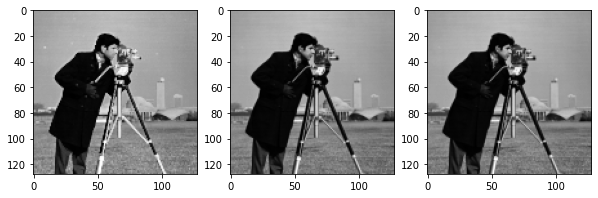

In [53]:
fig,axs=plt.subplots(1,3, figsize=(10,10))
axs[0].imshow(view_max, cmap='gray') #max pooling
axs[1].imshow(view_mean, cmap='gray')# avg ooling
axs[2].imshow(view_avg, cmap='gray')# avg ooling

### view_as_windows
- patch라 불림
- stride 개념으로 step 적용하여 overlapping 존재함
- 1칸씩 움직이므로 overlapping이 많이 되어서 더 섬세한 사진 
- 많은 연산량 
    - GPU의 발전으로 vectorization 연산하면 동시에 여러개 연산 가능
    
- 이미지가 부드러움

In [54]:
patch=view_as_windows(camera,(4,4),step=1)
patch_view=patch.reshape(patch.shape[0],patch.shape[1],-1)

512-4+1 =509

In [55]:
patch.shape ,patch_view.shape # view_as_blocks와 사이즈 상이함.

((509, 509, 4, 4), (509, 509, 16))

In [56]:
max_view= np.max(patch_view, axis=2)

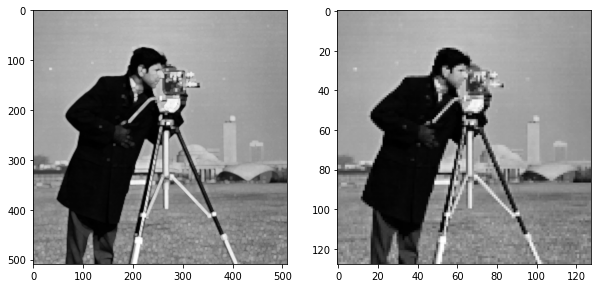

In [57]:
fig,axs=plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(max_view, cmap='gray') #max pooling
axs[1].imshow(view_max, cmap='gray')# avg ooling

(8,8)로 나누어 (64,64,8,8) 형태로 만들어 view_as_blocks & view_as_windows 각각  max, average, median pooling 비교
- max pooling:  전반적으로 큰값이 강조되면서 색상이 밝아짐
- view_as_blocks: 커다란 pixel처럼 나옴
- view_as_windows: 부드럽게 나옴

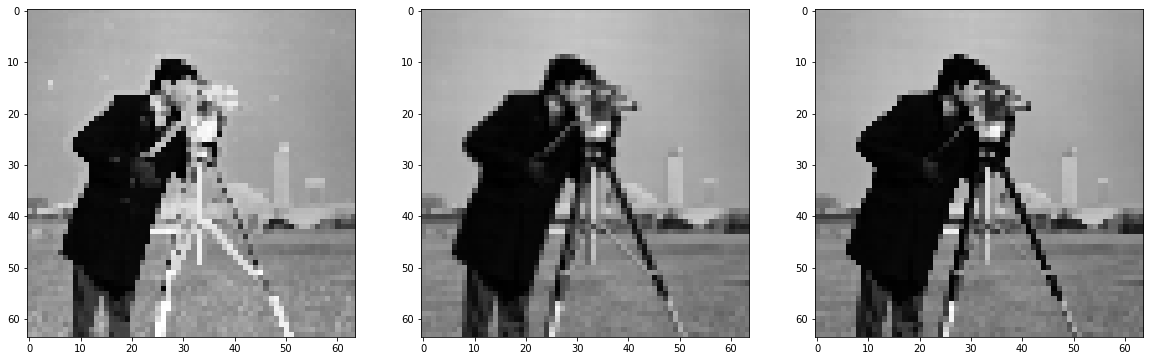

In [63]:
#(8,8) blocks
view8=view_as_blocks(camera,(8,8))
flatten_view8=view8.reshape(view8.shape[0], view8.shape[1],-1) #채널 정보 필요
fig,axs=plt.subplots(1,3, figsize=(20,20))

axs[0].imshow(np.max(flatten_view8, axis=2),cmap='gray')
axs[1].imshow(np.average(flatten_view8, axis=2),cmap='gray')
axs[2].imshow(np.median(flatten_view8, axis=2),cmap='gray')

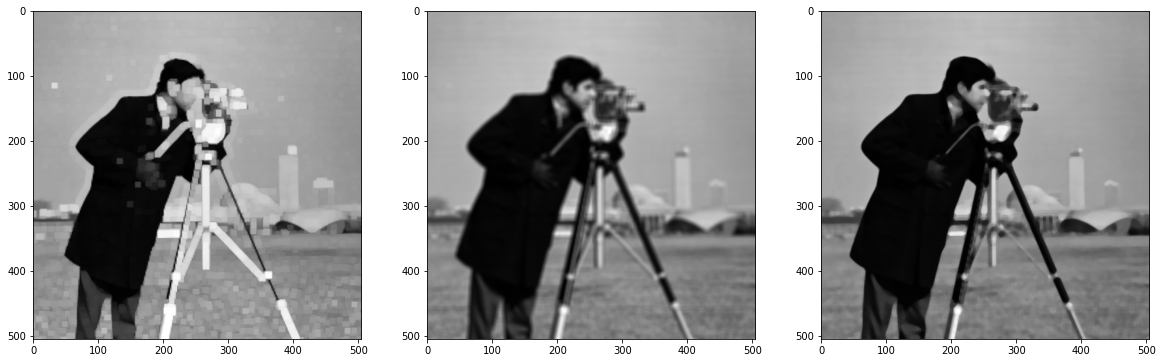

In [64]:
#(8,8) windows
view8=view_as_windows(camera,(8,8)) 
flatten_view8=view8.reshape(view8.shape[0], view8.shape[1],-1) #채널 정보 필요
fig,axs=plt.subplots(1,3, figsize=(20,20))

axs[0].imshow(np.max(flatten_view8, axis=2),cmap='gray')
axs[1].imshow(np.average(flatten_view8, axis=2),cmap='gray')
axs[2].imshow(np.median(flatten_view8, axis=2),cmap='gray')

Youtube 참고 : OpenCV Face Detection: Visualized
-  convolution에서  윈도우 이용해서 값 하나 하나 확인 예.Haar Cascade Classifier
- [The Convolution Layer (CNN Visualization)](https://www.youtube.com/watch?v=KiftWz544_8)
- [Convolutional Neural Network Visualization by Otavio Good
](https://www.youtube.com/watch?v=f0t-OCG79-U)

     
> #### SVM 
    - support vector machine  
    -  데이터들를 분리할때 각 데이터가 가장 먼 거리를 찾아줌
         - vectorization이 안되어 도태됨.
    - R-CNN에서 다룰 예정 